<a href="https://colab.research.google.com/github/iam-fern/Generate_multiplication_2X/blob/main/GQtest_cluster_data_multi_delta_(1_2)_n120_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import os
import statistics as stats
import scipy.stats as ss
import scipy.stats as st
from scipy.stats import f_oneway
from scipy import stats
import scipy.stats as stats
import time
import statsmodels.api as sm
from google.colab import drive
from statsmodels.formula.api import ols
from google.colab import files

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
base_path = '/content/drive/My Drive/pattern_multiplication_2X/multiplication_delta_1.2'

In [4]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_multi_delta_1.2_n120.csv')

In [5]:
df = pd.read_csv(file_path)
df

,rep,index,x1,x2,e,Y,y_hat,e_hat
0,0.0,0.0,95.728805,96.170392,-2.192705,199.706492,197.614973,2.091518
1,0.0,1.0,89.824242,66.942047,7.780447,174.546737,164.267650,10.279087
2,0.0,2.0,82.482057,22.683156,-11.888561,103.276651,115.249813,-11.973162
3,0.0,3.0,85.878367,53.555976,0.136727,149.571070,147.847114,1.723956
4,0.0,4.0,68.834220,35.235312,-3.726818,110.342714,114.607817,-4.265103
...,...,...,...,...,...,...,...,...
119995,999.0,115.0,96.329689,92.676220,6.045659,205.051568,200.695810,4.355758
119996,999.0,116.0,86.168932,55.333289,-10.737888,140.764334,153.016276,-12.251942
119997,999.0,117.0,51.055408,93.650294,-14.627936,140.077766,152.598490,-12.520724
119998,999.0,118.0,80.982974,48.586678,-1.811382,137.758269,140.772252,-3.013982


In [6]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1         x2          e           Y       y_hat  \
rep   index                                                            
0.0   0.0    95.728805  96.170392  -2.192705  199.706492  197.614973   
      1.0    89.824242  66.942047   7.780447  174.546737  164.267650   
      2.0    82.482057  22.683156 -11.888561  103.276651  115.249813   
      3.0    85.878367  53.555976   0.136727  149.571070  147.847114   
      4.0    68.834220  35.235312  -3.726818  110.342714  114.607817   
...                ...        ...        ...         ...         ...   
999.0 115.0  96.329689  92.676220   6.045659  205.051568  200.695810   
      116.0  86.168932  55.333289 -10.737888  140.764334  153.016276   
      117.0  51.055408  93.650294 -14.627936  140.077766  152.598490   
      118.0  80.982974  48.586678  -1.811382  137.758269  140.772252   
      119.0  47.076493  38.385425   7.885557  103.347475   94.017629   

                 e_hat  
rep   index             
0.0   0.0     2.091518  
      1.0    10.279087  
      2.0   -11.973162  
      3.0     1.723956  
      4.0    -4.265103  
...                ...  
999.0 115.0   4.355758  
      116.0 -12.251942  
      117.0 -12.520724  
      118.0  -3.013982  
      119.0   9.329846  

[120000 rows x 6 columns]

In [7]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1         x2          e           Y       y_hat  \
rep   index                                                            
0.0   0.0    95.728805  96.170392  -2.192705  199.706492  197.614973   
      1.0    89.824242  66.942047   7.780447  174.546737  164.267650   
      2.0    82.482057  22.683156 -11.888561  103.276651  115.249813   
      3.0    85.878367  53.555976   0.136727  149.571070  147.847114   
      4.0    68.834220  35.235312  -3.726818  110.342714  114.607817   
...                ...        ...        ...         ...         ...   
999.0 115.0  96.329689  92.676220   6.045659  205.051568  200.695810   
      116.0  86.168932  55.333289 -10.737888  140.764334  153.016276   
      117.0  51.055408  93.650294 -14.627936  140.077766  152.598490   
      118.0  80.982974  48.586678  -1.811382  137.758269  140.772252   
      119.0  47.076493  38.385425   7.885557  103.347475   94.017629   

                 e_hat  
rep   index             
0.0   0.0     2.091518  
      1.0    10.279087  
      2.0   -11.973162  
      3.0     1.723956  
      4.0    -4.265103  
...                ...  
999.0 115.0   4.355758  
      116.0 -12.251942  
      117.0 -12.520724  
      118.0  -3.013982  
      119.0   9.329846  

[120000 rows x 6 columns]

In [8]:
table.reset_index(inplace=True)
table

,rep,index,x1,x2,e,Y,y_hat,e_hat
0,0.0,0.0,95.728805,96.170392,-2.192705,199.706492,197.614973,2.091518
1,0.0,1.0,89.824242,66.942047,7.780447,174.546737,164.267650,10.279087
2,0.0,2.0,82.482057,22.683156,-11.888561,103.276651,115.249813,-11.973162
3,0.0,3.0,85.878367,53.555976,0.136727,149.571070,147.847114,1.723956
4,0.0,4.0,68.834220,35.235312,-3.726818,110.342714,114.607817,-4.265103
...,...,...,...,...,...,...,...,...
119995,999.0,115.0,96.329689,92.676220,6.045659,205.051568,200.695810,4.355758
119996,999.0,116.0,86.168932,55.333289,-10.737888,140.764334,153.016276,-12.251942
119997,999.0,117.0,51.055408,93.650294,-14.627936,140.077766,152.598490,-12.520724
119998,999.0,118.0,80.982974,48.586678,-1.811382,137.758269,140.772252,-3.013982


In [9]:
table.set_index(['rep', 'index'], inplace=True)

In [10]:
table

x1         x2          e           Y       y_hat  \
rep   index                                                            
0.0   0.0    95.728805  96.170392  -2.192705  199.706492  197.614973   
      1.0    89.824242  66.942047   7.780447  174.546737  164.267650   
      2.0    82.482057  22.683156 -11.888561  103.276651  115.249813   
      3.0    85.878367  53.555976   0.136727  149.571070  147.847114   
      4.0    68.834220  35.235312  -3.726818  110.342714  114.607817   
...                ...        ...        ...         ...         ...   
999.0 115.0  96.329689  92.676220   6.045659  205.051568  200.695810   
      116.0  86.168932  55.333289 -10.737888  140.764334  153.016276   
      117.0  51.055408  93.650294 -14.627936  140.077766  152.598490   
      118.0  80.982974  48.586678  -1.811382  137.758269  140.772252   
      119.0  47.076493  38.385425   7.885557  103.347475   94.017629   

                 e_hat  
rep   index             
0.0   0.0     2.091518  
      1.0    10.279087  
      2.0   -11.973162  
      3.0     1.723956  
      4.0    -4.265103  
...                ...  
999.0 115.0   4.355758  
      116.0 -12.251942  
      117.0 -12.520724  
      118.0  -3.013982  
      119.0   9.329846  

[120000 rows x 6 columns]

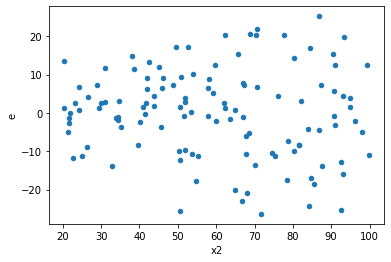

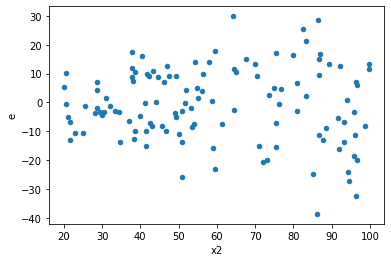

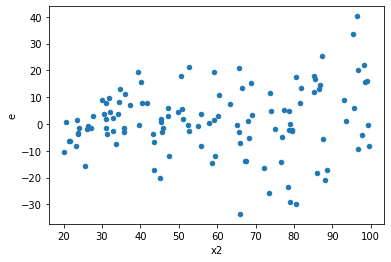

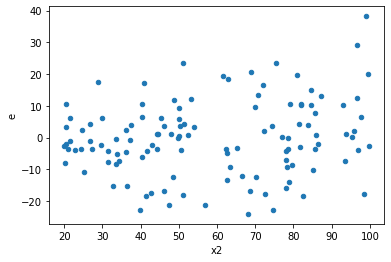

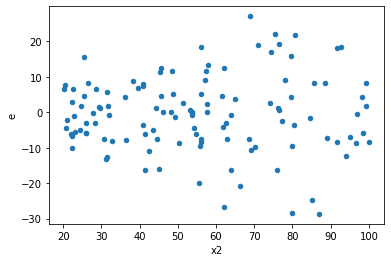

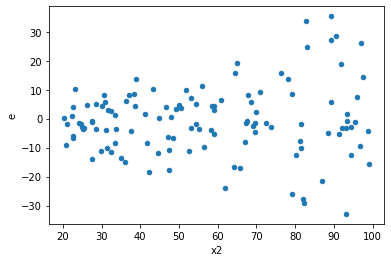

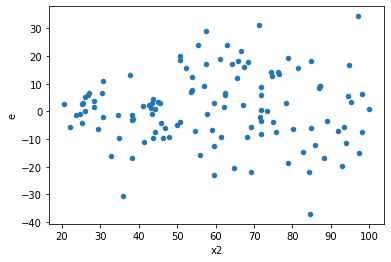

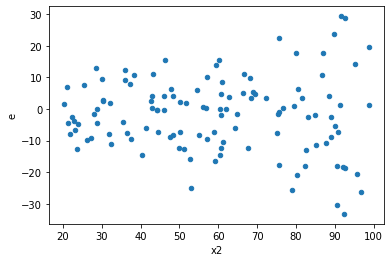

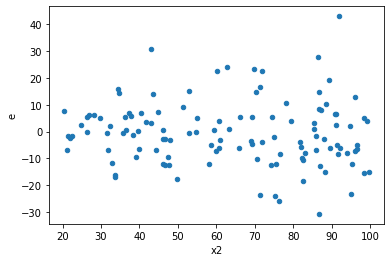

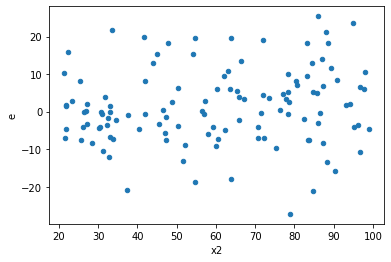

In [11]:
tablenew0 = table.loc[0.0]
tablenew1 = table.loc[1.0]
tablenew2 = table.loc[2.0]
tablenew3 = table.loc[3.0]
tablenew4 = table.loc[4.0]
tablenew5 = table.loc[5.0]
tablenew6 = table.loc[6.0]
tablenew7 = table.loc[7.0]
tablenew8 = table.loc[8.0]
tablenew9 = table.loc[9.0]
tablenew0.plot(x ='x2', y='e', kind = 'scatter')
tablenew1.plot(x ='x2', y='e', kind = 'scatter')
tablenew2.plot(x ='x2', y='e', kind = 'scatter')
tablenew3.plot(x ='x2', y='e', kind = 'scatter')
tablenew4.plot(x ='x2', y='e', kind = 'scatter')
tablenew5.plot(x ='x2', y='e', kind = 'scatter')
tablenew6.plot(x ='x2', y='e', kind = 'scatter')
tablenew7.plot(x ='x2', y='e', kind = 'scatter')
tablenew8.plot(x ='x2', y='e', kind = 'scatter')
tablenew9.plot(x ='x2', y='e', kind = 'scatter')

In [12]:
def get_result(run_replicate):
    new_table = table.loc[run_replicate]

    # show index
    new_table.reset_index(inplace=True)

    new_table.drop(['index'], axis=1, inplace=True)

    # แบ่งข้อมูลออกเป็น 2 กลุ่มด้วย k-mean

    #Set number of clusters
    x = new_table[["x1", "x2"]]

    #Another important parameter is init, which defines the method initialization to use (default='k-means++').
    #k-means++ algorithm uses the seeding technique for centroid initialization which is better than the random initialization method.
    kmeans = KMeans(n_clusters=2, init='k-means++', random_state=0).fit(x)

    #Generate cluster predictions and store in y_kmeans
    y_kmeans = kmeans.predict(x)

    #kmean_clusters.astype(float)
    kmean_clusters = pd.DataFrame({"clusters" : y_kmeans})

    # เชื่อมข้อมูลทั้ง 2 DataFrame เข้าด้วยกันด้วยคำสั่ง pd.concat
    data_clusters = pd.concat([new_table, kmean_clusters], axis=1)
    #data_clusters.reset_index(inplace=True)

    # กลุ่มที่ 1
    data_cluster0 = data_clusters[data_clusters.clusters == 0]

    y = data_cluster0[['Y']]
    x = data_cluster0[['x1', 'x2']]
    x = sm.add_constant(x)
    model1 = sm.OLS(y, x).fit()

    DF1 = model1.df_resid + 1
    SSE1 = model1.ssr
    MSE1 = SSE1/DF1

    # กลุ่มที่ 2
    data_cluster1 = data_clusters[data_clusters.clusters == 1]

    y = data_cluster1[['Y']]
    x = data_cluster1[['x1', 'x2']]
    x = sm.add_constant(x)
    model2 = sm.OLS(y, x).fit()

    DF2 = model2.df_resid + 1
    SSE2 = model2.ssr
    MSE2 = SSE2/DF2

    # คำนวณค่าสถิติ
    GQ_test_clusters = (SSE2/DF2) / (SSE1/DF1)

    df2 = DF2
    df1 = DF1

    # คำนวณค่า p-value
    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test_clusters, df1, df2)))
    p_greater = ss.f.cdf(GQ_test_clusters, df1, df2)
    p_less = 1.0-ss.f.cdf(GQ_test_clusters, df1, df2)

    return df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test_clusters, two_tailed, p_greater, p_less

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df1=[]
list_df2=[]
list_SSE1=[]
list_SSE2=[]
list_MSE1=[]
list_MSE2=[]
list_GQ_test_clusters=[]
list_result_test=[]
list_two_tailed=[]
list_p_greater=[]
list_p_less=[]
#list_result_test01=[]

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test_clusters, two_tailed, p_greater, p_less=get_result(run_replicate)
    list_df1.append(df1)
    list_SSE1.append(SSE1)
    list_df2.append(df2)
    list_SSE2.append(SSE2)
    list_MSE1.append(MSE1)
    list_MSE2.append(MSE2)
    list_GQ_test_clusters.append(GQ_test_clusters)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)
    list_p_less.append(p_less)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future versi

In [13]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test_clusters":list_GQ_test_clusters, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1) & (result["less"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                 if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test_clusters,two_tailed,greater,less,Result_test
Replicate,,,,,,,,,,,
0.0,55.0,61.0,4286.500330741078,10762.933441208603,77.93636964983779,176.44153182309185,2.26391776542621,0.0020837826496751255,0.9989581086751624,0.0010418913248375627,Reject001=0 : Heteroscedasticity
1.0,51.0,65.0,7928.884516671319,10311.507021845355,155.46832385630037,158.6385695668516,1.0203915860923636,0.9309293710593094,0.5345353144703453,0.4654646855296547,Reject001=1 : Homoscedasticity
2.0,61.0,55.0,4381.403854344951,13401.023766439344,71.82629269417951,243.65497757162444,3.3922811331646128,8.770174043881696e-06,0.9999956149129781,4.385087021940848e-06,Reject001=0 : Heteroscedasticity
10.0,51.0,65.0,3676.993360364,13981.020851913128,72.0979090267451,215.0926284909712,2.9833407292183947,3.87847361578153e-05,0.9999806076319211,1.939236807890765e-05,Reject001=0 : Heteroscedasticity
11.0,70.0,46.0,6348.204079897232,7110.360985919404,90.6886297128176,154.5730649112914,1.7044370986834372,0.05569886261456114,0.9721505686927194,0.02784943130728057,Reject001=1 : Homoscedasticity
13.0,68.0,48.0,7095.209395724485,6135.243679955266,104.34131464300714,127.8175766657347,1.224994884366266,0.46081283482246427,0.7695935825887679,0.23040641741123213,Reject001=1 : Homoscedasticity
14.0,57.0,59.0,4656.240060705474,6673.716819862557,81.6884221176399,113.11384440445012,1.3846986081032917,0.2172595269187263,0.8913702365406369,0.10862976345936315,Reject001=1 : Homoscedasticity
16.0,58.0,58.0,5546.707138281065,10857.088819721712,95.63288169450112,187.19118654692608,1.9573935578445456,0.011629533600308495,0.9941852331998458,0.005814766800154247,Reject001=1 : Homoscedasticity
19.0,63.0,53.0,6712.730242573087,7234.371545653025,106.5512736916363,136.49757633307595,1.2810506304045268,0.35574323791537954,0.8221283810423102,0.17787161895768977,Reject001=1 : Homoscedasticity


In [14]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test_clusters":list_GQ_test_clusters, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater","less"]].apply(lambda value: value[0] if value[0]<0.5 else (2*value[1] if value[1]<0.5 else 2*value[2]) , axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                     if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater", "less"])
result_show.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test_clusters,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,55.0,61.0,4286.500330741078,10762.933441208603,77.93636964983779,176.44153182309185,2.26391776542621,0.0020837826496751255,Reject001=0 : Heteroscedasticity
1.0,51.0,65.0,7928.884516671319,10311.507021845355,155.46832385630037,158.6385695668516,1.0203915860923636,0.9309293710593094,Reject001=1 : Homoscedasticity
2.0,61.0,55.0,4381.403854344951,13401.023766439344,71.82629269417951,243.65497757162444,3.3922811331646128,8.770174043881696e-06,Reject001=0 : Heteroscedasticity
3.0,56.0,60.0,9707.726390864083,5755.9877216915165,173.35225697971578,95.93312869485861,0.5533999404812128,0.026716124655375057,Reject001=1 : Homoscedasticity
4.0,51.0,65.0,6714.161261464066,6714.145482469401,131.6502208130209,103.29454588414463,0.7846135406855942,0.3698435138986922,Reject001=1 : Homoscedasticity
5.0,52.0,64.0,11701.95815568963,4127.6434156491705,225.0376568401852,64.49442836951829,0.286593938432803,7.62084868041993e-06,Reject001=0 : Heteroscedasticity
6.0,56.0,60.0,11193.808430386009,7391.92925762276,199.88943625689302,123.19882096037934,0.6163348262288719,0.06920724845683952,Reject001=1 : Homoscedasticity
7.0,53.0,63.0,11039.366369443309,4297.430475228133,208.28993149893034,68.2131821464783,0.3274915002160275,5.186061472010091e-05,Reject001=0 : Heteroscedasticity
8.0,60.0,56.0,11782.424333987357,5024.064202266653,196.3737388997893,89.71543218333309,0.45686064076579724,0.0032012125302025864,Reject001=0 : Heteroscedasticity


In [15]:
result_show['Result_test'].value_counts()

Reject001=1 : Homoscedasticity      623
Reject001=0 : Heteroscedasticity    377
Name: Result_test, dtype: int64